#***Muawa Real Estate - Price Predictor***

In [1]:
import pandas as pd

#***Load and Prepare Data***

In [2]:
housing=pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#***Housing Data Summary***

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       495 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,495.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282461,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.708158,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.879500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.202000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.622000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#***Strategies for Handling Missing Data***
***There have three Options to handle missing values***

1: Get rid of the missing data points.



2: Get rid of the whole attribute.



3: Set the value to some value(0,mean or median)

In [6]:

# Option 1
a=housing.dropna(subset=["RM"])
a.shape

(495, 14)

In [7]:
# Option 2
housing.drop("RM",axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
# Option 3
#Changes will not be made to the original housing data until we use inplace=True.
median=housing["RM"].median()
housing["RM"].fillna(median)

0      6.575
1      6.202
2      7.185
3      6.998
4      6.202
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

#***Fit Imputer to Housing Data***

In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [10]:
imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20200e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [11]:
# See imputer is work or not
x=imputer.transform(housing)
housing=pd.DataFrame(x,columns=housing.columns)
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.280711,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.700501,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.202000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.613500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#***Housing Data Visualization***

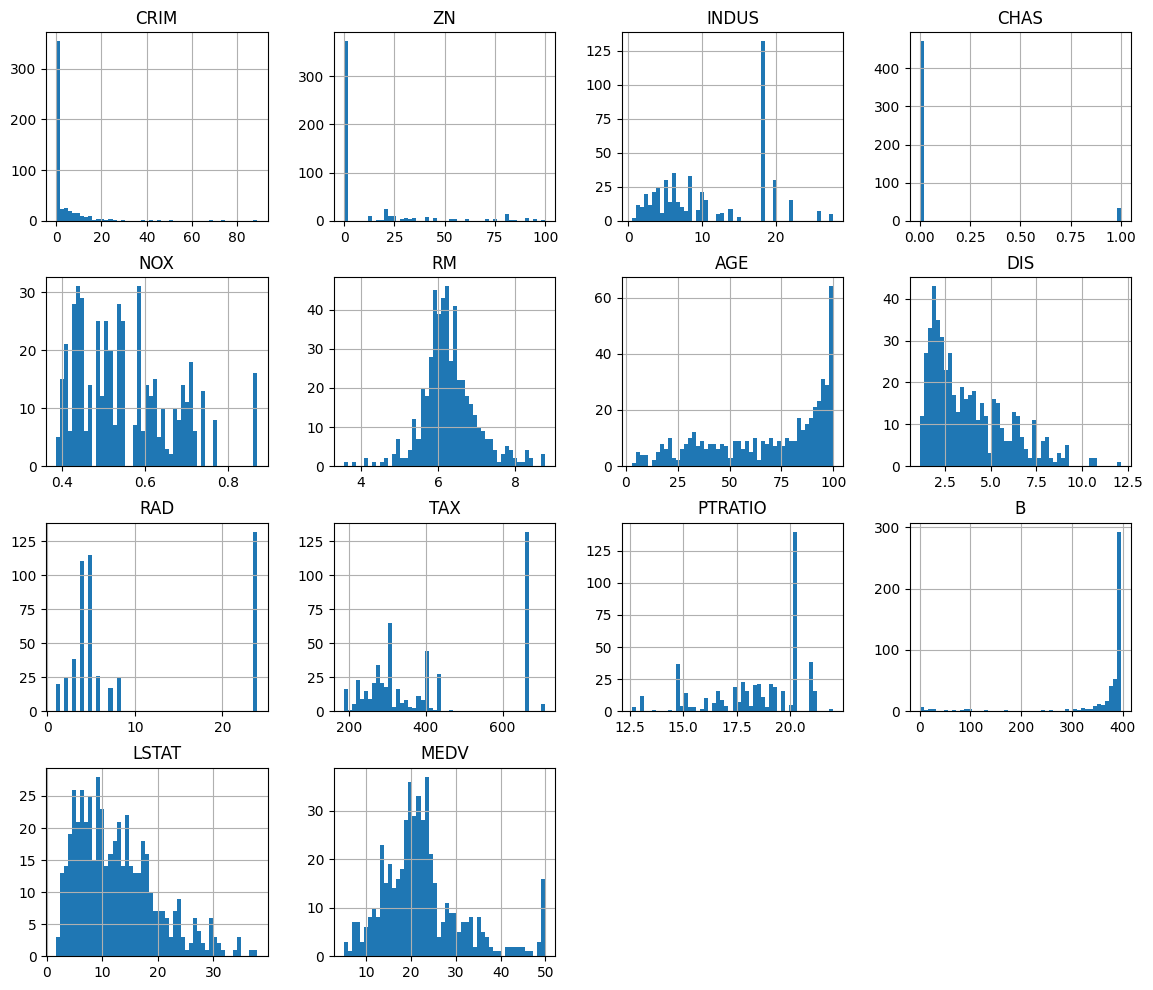

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(14,12))
plt.show()

#***Looking for Correlation***

In [13]:
#MEDV stands for Median Value of Owner-Occupied Homes ....Target Attribute
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.693280
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

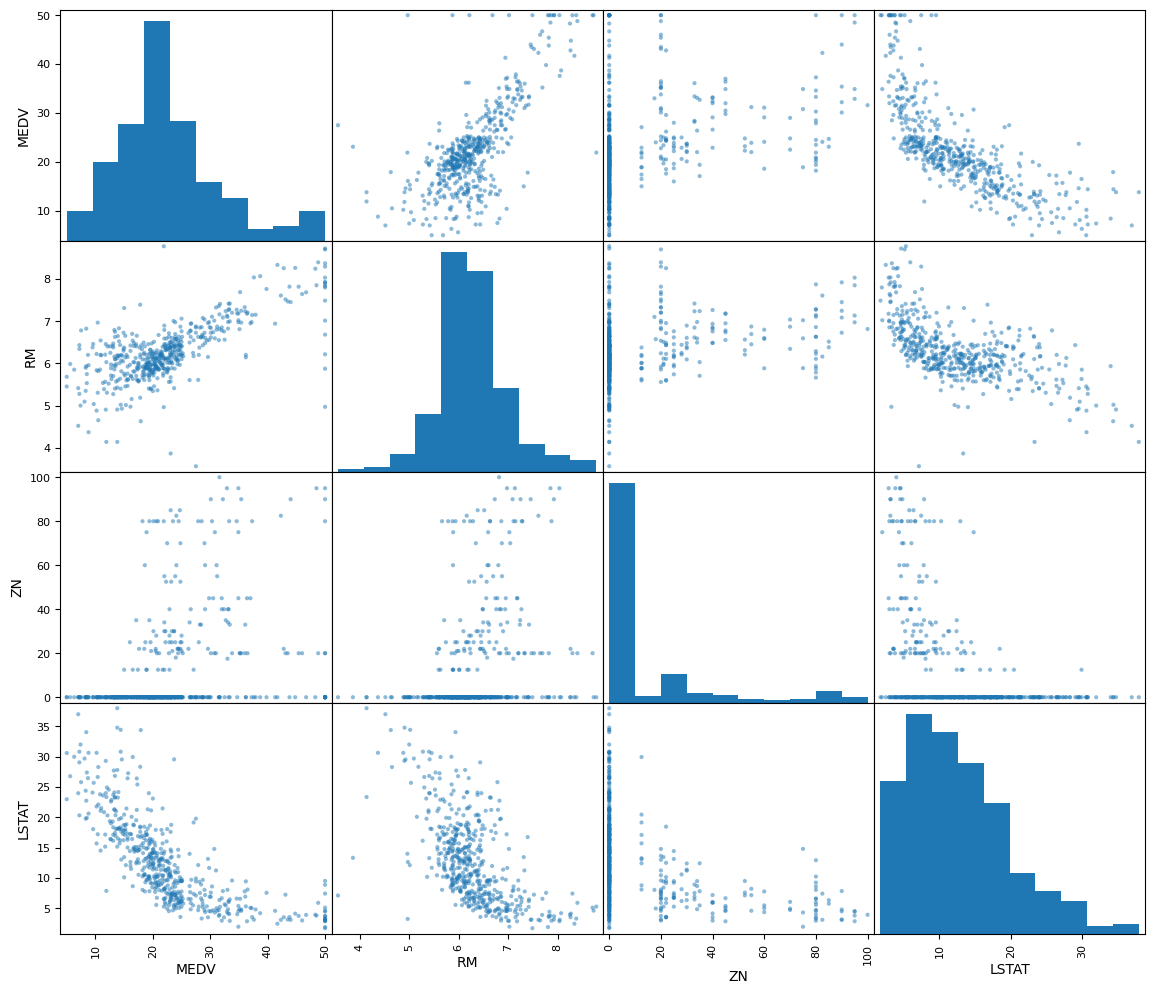

In [14]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(14,12))
plt.show()

<Axes: xlabel='RM', ylabel='MEDV'>

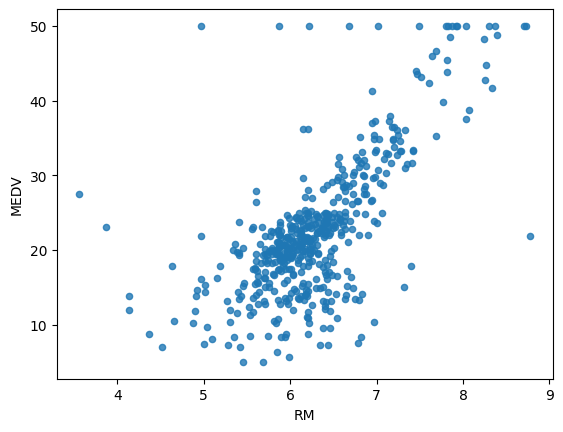

In [15]:
# Let's examine the correlation between the variable RM and the target variable MEDV.#
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)


#***Trying out Attribute Combinations***
Attribute combinations involve creating new features by combining existing ones, enhancing the model's ability to capture complex relationships in the data.

In [16]:
housing["TAXRM"]=housing['TAX']/housing['RM']
housing["TAXRM"]


0      45.019011
1      39.019671
2      33.681280
3      31.723350
4      35.794905
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [17]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0.0,0.469,6.202,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,39.019671
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0.0,0.458,6.202,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,35.794905


<Axes: xlabel='TAXRM', ylabel='MEDV'>

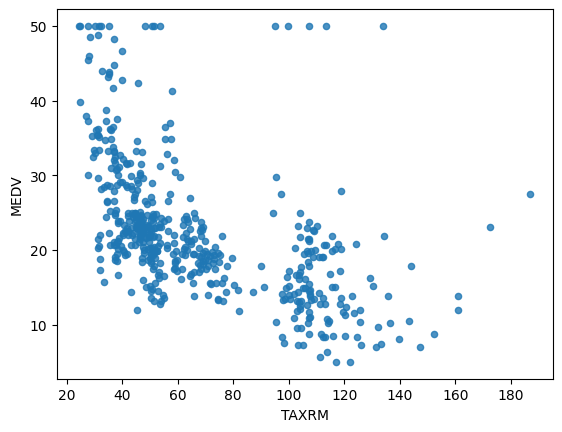

In [18]:
#"Examine the correlation between the variable TAXRM and the target variable MEDV."
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

## ***Train-Test Splitting (User-defined function)***

In [19]:
# User defined function
import numpy as np
def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled=np.random.permutation(len(data))
  test_set_size=int(len(data)*test_ratio)
  test_indices=shuffled[:test_set_size]
  train_indices=shuffled[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [20]:
train_set,test_set=split_train_test(housing,0.2)
print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}\n")

Rows in Train Set: 405
Rows in Test Set: 101



#***Train-Test Splitting( 2nd Method)***

In [21]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in Train Set: {len(train_set)}\nRows in Test Set: {len(test_set)}\n")

Rows in Train Set: 404
Rows in Test Set: 102



##***StratifiedShuffleSplit***
StratifiedShuffleSplit maintains class distribution in train-test splits, crucial for balanced and representative evaluations, especially in imbalanced datasets.

In [22]:

from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

  #Train Data
  housing_tr=strat_train_set.copy()
   #Test Data
  housing_test=strat_test_set.copy()

#***Data Segmentation: Housing Features and Labels***

In [23]:
Housing_Features=housing_tr.drop("MEDV",axis=1)
Housing_Label=housing_tr["MEDV"].copy()


#***Scikit-Learn Design***
***Primally, Three types of objects***


***1: Estimators***- It estimates some parameters based on dataset
 e.g imputer and it has a fit method - Fit the datasets and calculates parameters.

***2: Transformers*** - Transform method takes input and return output based on learning from fit().It also has a convenience function called fit_transform() which fits and then transforms.





***3: Predictores*** - LinearRegression model is an example of predictor. fit() and predict() are two common functions.It also gives score() function which will evaluate the predictions.

#***Feature Scaling***
***Primarily,Two types of feature scaling methods***


***1: Min-Max Scaling (Normalization)***


   (value-min)/(max-min)

Sklearn providees a class called MinMaxScaler for this



***2: Standardization***

(value-mean)/std



sklearn provides a class called Standard Scaler for this

#***Creating a Pipeline***
We use a pipeline in machine learning to streamline and automate the process of data preprocessing and model training. A pipeline allows you to sequence multiple data processing steps and model training into a single entity, which offers several benefits.



***When we want to automate this process, we use a pipeline.***

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# add as many as you want in your pipeline
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


In [25]:
housing_features=my_pipeline.fit_transform(Housing_Features)
housing_features

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.50684753],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739, -0.80471992],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158,  1.11876022],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303, -1.02424292],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575,  1.09824544],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681, -0.65613593]])

#***Selecting a desired model for Muawa Real Estate***
#***Linear Regression Model***

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing_features,Housing_Label)

LinearRegression()

In [27]:
some_data=Housing_Features.iloc[:5]
some_labels=Housing_Label.iloc[:5]

In [28]:
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.63627048, 26.916074  , 18.87924022, 25.0429817 , 24.1781656 ])

In [29]:
# Results that are most similar indicate good predictions.
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

#***Evaluating the Model***

In [30]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_features)
lin_mse=mean_squared_error(Housing_Label,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [31]:
print("Root mean Square Error:",lin_rmse)

Root mean Square Error: 4.246884319353141


#***Decision Tree Regressor Model***

In [32]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(housing_features,Housing_Label)

DecisionTreeRegressor()

***A root mean square error of 0.0 may indicate overfitting of the data.***

In [33]:
housing_prediction=model1.predict(housing_features)
mse=mean_squared_error(Housing_Label,housing_prediction)
rmse=np.sqrt(mse)
print("Root mean Square Error:",rmse)

Root mean Square Error: 0.0


***If overfitting occurs, we can use cross-validation***
#***Using Better Evaluation Technique - Cross Validation***

In [34]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1,housing_features,Housing_Label,scoring="neg_mean_squared_error",cv=10)
rmse_score=np.sqrt(-scores)


In [35]:
rmse_score

array([4.16483537, 5.52219469, 4.87534864, 4.55944477, 3.27913861,
       4.40624557, 6.42288876, 3.72578851, 3.86710486, 3.82482026])

***Create a function to observe the scores of each model.***

In [36]:
def print_scores(scores):
  print("Scores: ",scores)
  print("Mean: ",scores.mean())
  print("Standard Deviation: ",scores.std())

***Linear Regression***

In [37]:
print("Linear Regression")
print_scores(lin_rmse)


Linear Regression
Scores:  4.246884319353141
Mean:  4.246884319353141
Standard Deviation:  0.0


***Decision Tree***

In [38]:
print("Decision Tree ")
print_scores(rmse_score)

Decision Tree 
Scores:  [4.16483537 5.52219469 4.87534864 4.55944477 3.27913861 4.40624557
 6.42288876 3.72578851 3.86710486 3.82482026]
Mean:  4.464781002229873
Standard Deviation:  0.8911708479163778


In [39]:
from joblib import dump,load
dump(model1,'RealEstate.joblib')

['RealEstate.joblib']

#***Model Testing***

In [40]:
Housing_F = housing_test.drop("MEDV", axis=1)
Housing_L = housing_test["MEDV"].copy()

housing_fe = my_pipeline.fit_transform(Housing_F)
# Make predictions using the model
final_predictions = model1.predict(housing_fe)
# Calculate the final mean squared error and root mean squared error
final_mse = mean_squared_error(Housing_L, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE: {final_rmse:.2f}")


Final RMSE: 4.49


#***Application Phase***

In [41]:
3#Take input from Users and predict Price


CRIM = input("\nPlease enter CRIM: ").strip()
ZN = input("\nPlease enter ZN: ").strip()
INDUS = input("\nPlease enter INDUS: ").strip()
CHAS = input("\nPlease enter CHAS: ").strip()
NOX = input("\nPlease enter NOX: ").strip()
RM = input("\nPlease enter RM : ").strip()
AGE = input("\nPlease enter AGE: ").strip()
DIS = input("\nPlease enter DIS: ").strip()
RAD = input("\nPlease enter RAD: ").strip()
TAX = input("\nPlease enter TAX: ").strip()
PTRATID = input("\nPlease enter PTRATID: ").strip()
B = input("\nPlease enter B: ").strip()
LSTAT = input("\nPlease enter LSTAT: ").strip()
TAXRM = input("\nPlease enter TAXRM: ").strip()






Please enter CRIM: 0.06905

Please enter ZN: 0.0

Please enter INDUS: 2.18

Please enter CHAS: 0

Please enter NOX: 0.458

Please enter RM : 6.998

Please enter AGE: 54.2

Please enter DIS: 6.0622

Please enter RAD: 3

Please enter TAX: 222

Please enter PTRATID: 18.7

Please enter B: 96.90

Please enter LSTAT: 5.33

Please enter TAXRM: 35.79


In [42]:



# Create a DataFrame from user input
user_input = pd.DataFrame({
    'CRIM': [CRIM],
    'ZN': [ZN],
    'INDUS': [INDUS],
    'CHAS': [CHAS],
    'NOX': [NOX],
    'RM': [RM],
    'AGE': [AGE],
    'DIS': [DIS],
    'RAD': [RAD],
    'TAX': [TAX],
    'PTRATID': [PTRATID],
    'B': [RAD],
    'LSTAT': [LSTAT],
    'TAXRM': [TAXRM]
})

print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)



User Input Feature Vector:

      CRIM   ZN INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATID  B  \
0  0.06905  0.0  2.18    0  0.458  6.998  54.2  6.0622   3  222    18.7  3   

  LSTAT  TAXRM  
0  5.33  35.79  


In [54]:
user = my_pipeline.transform(user_input)

# Make predictions using the model
value = model1.predict(user)


In [55]:
from prettytable import PrettyTable
pretty_table = PrettyTable()
pretty_table.add_column("       ** Median Value(MEDV) **       ",[value])
print(pretty_table)

+----------------------------------------+
|        ** Median Value(MEDV) **        |
+----------------------------------------+
|                 [21.2]                 |
+----------------------------------------+


#***Thank you for reviewing this document.***